In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.utils import resample

In [3]:
# Load the data from the file
data = pd.read_csv('/content/co2_mm_mlo.txt', delim_whitespace=True, comment='#', header=None,
                   names=['year', 'month', 'decimal_date', 'monthly_average',
                          'deseasonalized', 'n_days', 'st_dev', 'uncertainty'])
# Extract relevant columns
x = data['decimal_date']
y = data['monthly_average']

<ipython-input-3-40c05851bf17>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/co2_mm_mlo.txt', delim_whitespace=True, comment='#', header=None,


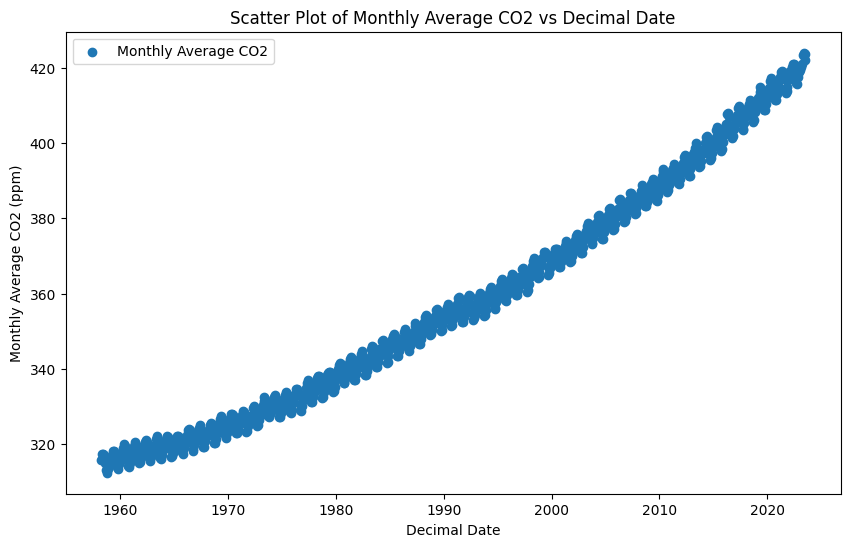

In [4]:
# Scatter plot of decimal date vs monthly average
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Monthly Average CO2')
plt.xlabel('Decimal Date')
plt.ylabel('Monthly Average CO2 (ppm)')
plt.title('Scatter Plot of Monthly Average CO2 vs Decimal Date')
plt.legend()
plt.show()

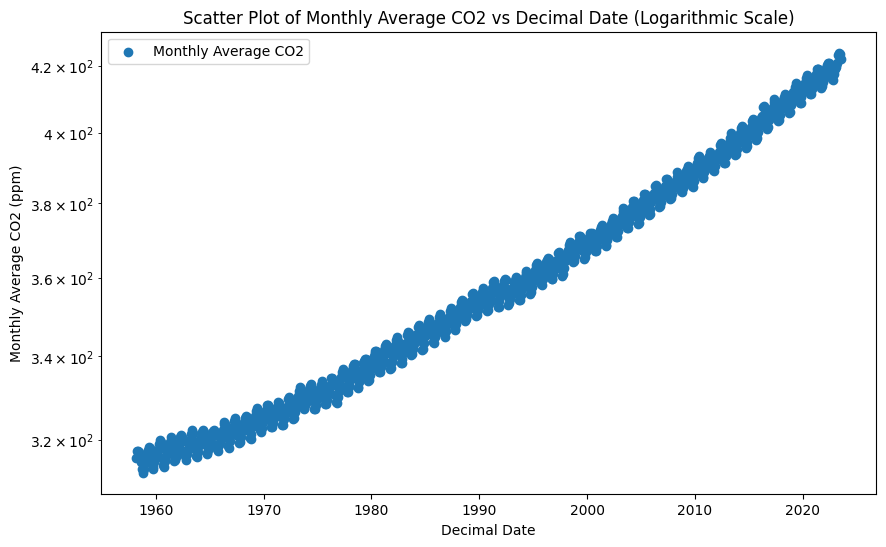

In [5]:
# Scatter plot with logarithmic y-axis
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Monthly Average CO2')
plt.yscale('log')
plt.xlabel('Decimal Date')
plt.ylabel('Monthly Average CO2 (ppm)')
plt.title('Scatter Plot of Monthly Average CO2 vs Decimal Date (Logarithmic Scale)')
plt.legend()
plt.show()

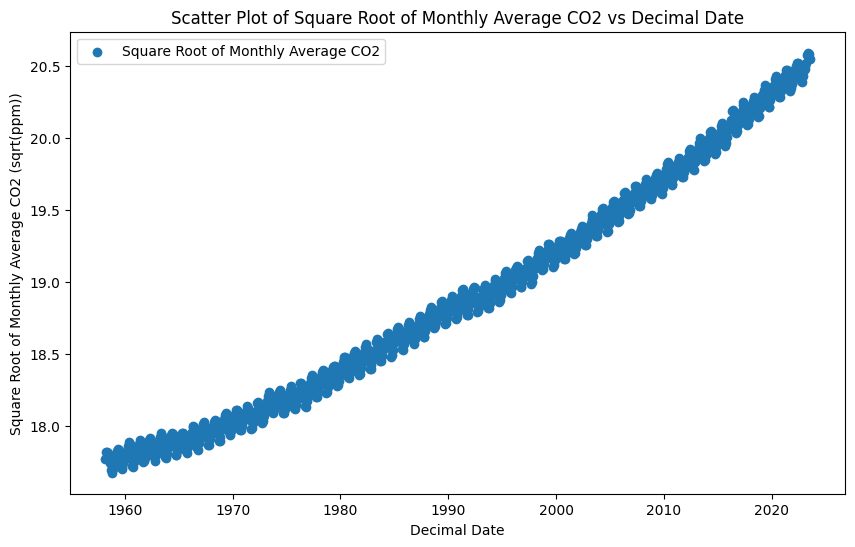

In [6]:
# Scatter plot of square root of y values
plt.figure(figsize=(10, 6))
plt.scatter(x, np.sqrt(y), label='Square Root of Monthly Average CO2')
plt.xlabel('Decimal Date')
plt.ylabel('Square Root of Monthly Average CO2 (sqrt(ppm))')
plt.title('Scatter Plot of Square Root of Monthly Average CO2 vs Decimal Date')
plt.legend()
plt.show()

1. Linear Scale: The scatter plot on a linear scale shows the actual values of the monthly average CO2 concentrations over time.
2. Logarithmic Scale: The scatter plot on a logarithmic scale compresses the y-axis, making it easier to observe changes in growth rates over time.
3. Square Root Scale: The scatter plot of the square root of y values reduces the range of y-axis values, making it easier to visualize smaller variations in CO2 concentrations.

In [7]:
# Linear model fitting
def linear_model(x, a, b):
    return a * x + b

popt_linear, _ = curve_fit(linear_model, x, y)
a_linear, b_linear = popt_linear

# Polynomial model fitting (3rd order polynomial)
def poly_model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt_poly, _ = curve_fit(poly_model, x, y)
a_poly, b_poly, c_poly, d_poly = popt_poly

In [8]:
a_poly

3.489509123180256e-05

In [ ]:
# Prediction for 2050
year_2050 = 2050
co2_2050_linear = linear_model(year_2050, *popt_linear)
co2_2050_poly = poly_model(year_2050, *popt_poly)

print(f"Predicted CO2 concentration in 2050 using linear model: {co2_2050_linear:.2f} ppm")
print(f"Predicted CO2 concentration in 2050 using polynomial model: {co2_2050_poly:.2f} ppm")

Predicted CO2 concentration in 2050 using linear model: 454.36 ppm
Predicted CO2 concentration in 2050 using polynomial model: 501.79 ppm


In [ ]:
# Check the overfitting
# Calculate the chi-square statistic for both models
chi_square_linear = np.sum(((y - linear_model(x, *popt_linear)) / np.sqrt(y)) ** 2)
chi_square_poly = np.sum(((y - poly_model(x, *popt_poly)) / np.sqrt(y)) ** 2)
print(f"Chi-square statistic for linear model: {chi_square_linear}")
print(f"Chi-square statistic for polynomial model: {chi_square_poly}")

Chi-square statistic for linear model: 49.77288644887024
Chi-square statistic for polynomial model: 10.834650491129178


The linear model predicts the CO2 concentration in 2050 to be approximately 454.36 ppm. This model assumes a constant rate of increase, which is simple but may miss complex trends. On the other hand, the polynomial model predicts the CO2 concentration in 2050 to be around 501.79 ppm. The polynomial model provides a higher predicted value for 2050, suggesting that the rate of CO2 increase may be accelerating. This aligns with observations of increasing industrial activity and emissions. Therefore, the polynomial model is likely more accurate for long-term predictions due to its ability to capture non-linear trends and we already checked and saw that we are not overfitting the data (because $χ^2$ is not zero!).

In [ ]:
# Bootstrapping for polynomial model
n_iterations = 1000
bootstrap_estimates = []

for _ in range(n_iterations):
    x_resampled, y_resampled = resample(x, y)
    popt_resampled, _ = curve_fit(poly_model, x_resampled, y_resampled)
    bootstrap_estimates.append(popt_resampled)

bootstrap_estimates = np.array(bootstrap_estimates)
bootstrap_means = np.mean(bootstrap_estimates, axis=0)
bootstrap_std_devs = np.std(bootstrap_estimates, axis=0)

print(f"Bootstrap estimates for polynomial model parameters:")
print(f"a: {bootstrap_means[0]:.4f} ± {bootstrap_std_devs[0]:.4f}")
print(f"b: {bootstrap_means[1]:.4f} ± {bootstrap_std_devs[1]:.4f}")
print(f"c: {bootstrap_means[2]:.4f} ± {bootstrap_std_devs[2]:.4f}")
print(f"d: {bootstrap_means[3]:.4f} ± {bootstrap_std_devs[3]:.4f}")

Bootstrap estimates for polynomial model parameters:
a: 0.0000 ± 0.0000
b: -0.1974 ± 0.0880
c: 368.1977 ± 175.0976
d: -228644.3038 ± 116192.5485
